# 7. Maximize Gaussian

In [5]:
import numpy as np

from matplotlib import pyplot as plt


In [2]:
np.pi

3.141592653589793

In [3]:
np.exp(1)

2.718281828459045

In [4]:
def f(mu, sigma2, x):
    val = 1/np.sqrt(2 * np.pi * sigma2) * np.exp(-1/2 * ((x - mu)** 2) / sigma2)
    return val

In [5]:
f(10, 4, 8)

0.12098536225957168

In [6]:
f(10, 4, 10)

0.19947114020071635

In [7]:
f(10, 4, 12)

0.12098536225957168

# 15. New Mean and Variance

In [14]:
# mu = 10
# sigma2 = 4
# nu = 12
# r2 = 4

mu = 10
sigma2 = 8
nu = 13
r2 = 2

In [15]:
mu_prime = (r2 * mu + sigma2 * nu) / (sigma2 + r2)
sigma2_prime = 1 / (1/sigma2 + 1/r2)

In [16]:
mu_prime, sigma2_prime

(12.4, 1.6)

In [17]:
f(mu, sigma2, mu)

0.14104739588693907

In [18]:
f(nu, r2, nu)

0.28209479177387814

In [19]:
f(mu_prime, sigma2_prime, mu_prime)

0.31539156525252005

In [20]:
def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1 / (1/var1 + 1/var2)
    return [new_mean, new_var]

In [21]:
update(10, 8, 13, 2)

[12.4, 1.6]

# 17. Prediction Function

In [22]:
def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

In [23]:
predict(10, 4, 12, 4)

[22, 8]

# 18. Kalman Filter Code

In [ ]:
# Please return ONLY the final values of the mean and the variance in a list [mu, sig]. 

def kalman(measurements, motion, measurement_sig, motion_sig, mu, sig):
    # TODO: Insert code here
    print('start', mu, sig)
    
    for i in range(len(measurements)):
        print('\nround i')
        
        measurement = measurements[i]
        print('measurement', measurement, measurement_sig)
        
        mu, sig = update(mu, sig, measurement, measurement_sig)
        print('update', mu, sig)
        
        mot = motion[i]
        print('mot', mot, motion_sig)
        
        mu, sig = predict(mu, sig, mot, motion_sig)
        print('predict', mu, sig)
    
        
    return [mu, sig]

In [28]:
# estimate of position
mu = 0.  
sig = 10000.

# measurement of position
measurements = [5., 6., 7., 9., 10.]  
measurement_sig = 4.

# motion
motion = [1., 1., 2., 1., 1.]  
motion_sig = 2.

kalman(measurements, motion, measurement_sig, motion_sig, mu, sig)

start 0.0 10000.0

round i
measurement 5.0 4.0
update 4.998000799680128 3.9984006397441023
mot 1.0 2.0
predict 5.998000799680128 5.998400639744102

round i
measurement 6.0 4.0
update 5.999200191953932 2.399744061425258
mot 1.0 2.0
predict 6.999200191953932 4.399744061425258

round i
measurement 7.0 4.0
update 6.999619127420922 2.0951800575117594
mot 2.0 2.0
predict 8.999619127420921 4.09518005751176

round i
measurement 9.0 4.0
update 8.999811802788143 2.0235152416216957
mot 1.0 2.0
predict 9.999811802788143 4.023515241621696

round i
measurement 10.0 4.0
update 9.999906177177365 2.0058615808441944
mot 1.0 2.0
predict 10.999906177177365 4.005861580844194


[10.999906177177365, 4.005861580844194]

In [29]:
mu = 0.
sig = 0.00000000001

measurements = [5., 6., 7., 9., 10.]
measurement_sig = 4.

motion = [1., 1., 2., 1., 1.]
motion_sig = 2.

kalman(measurements, motion, measurement_sig, motion_sig, mu, sig)

start 0.0 1e-11

round i
measurement 5.0 4.0
update 1.2499999999968749e-11 9.999999999975e-12
mot 1.0 2.0
predict 1.0000000000125 2.00000000001

round i
measurement 6.0 4.0
update 2.6666666666805554 1.3333333333377777
mot 1.0 2.0
predict 3.6666666666805554 3.3333333333377775

round i
measurement 7.0 4.0
update 5.181818181826859 1.8181818181831404
mot 2.0 2.0
predict 7.181818181826859 3.8181818181831404

round i
measurement 9.0 4.0
update 8.069767441865062 1.9534883720933691
mot 1.0 2.0
predict 9.069767441865062 3.953488372093369

round i
measurement 10.0 4.0
update 9.53216374269239 1.9883040935673388
mot 1.0 2.0
predict 10.53216374269239 3.988304093567339


[10.53216374269239, 3.988304093567339]

# 25. Kalman Matrices

In [30]:
# This cell helps implement a matrix class for you.
# Make sure to run this first before you continue!

from math import *

class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise ValueError("Invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise ValueError("Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print(self.value[i])
        print(' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError("Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError("Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise ValueError("Matrices must be m*n and n*p to multiply")
        else:
            # multiply if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise ValueError("Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                try:
                    res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
                except:
                    raise ValueError("Zero diagonal")
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)

In [232]:
# Write a function 'kalman_filter' that implements a multi-
# dimensional Kalman Filter for the example given

# Implement the filter function below

def kalman_filter(x, P, u, F, H, R, I, measurements):
    print('start Kalman Filter')
    print('x\n', x)
    print('P\n', P)        
    
    max_step = len(measurements) + 1
    
    step = np.arange(max_step)
    
    measured_position = np.zeros(max_step)
        
    updated_position = np.zeros(max_step)
    updated_velocity = np.zeros(max_step)
    
    predicted_position = np.zeros(max_step)    
    predicted_velocity = np.zeros(max_step)    
    
    for i in range(len(measurements)):
        print('\nstep', i)
        
        step[i] = i        
        
        z = matrix([[measurements[i]]])
        print('z', z)
        
        measured_position[i] = measurements[i]
        
        
        # measurement update
        y = z - H * x
        S = H * P * H.transpose() + R
        K = P * H.transpose() * S.inverse()

        print('y\n', y)        
        print('K\n', K)
        print('K * y\n', K * y)        
        
        x = x + K * y
        P = (I - K * H) * P
        print('measurement update')
        print('x\n', x)
        print('P\n', P)        

        updated_position[i] = x.value[0][0]
        updated_velocity[i] = x.value[1][0]
        
        
        # prediction
        x = F * x + u
        P = F * P * F.transpose()        
        print('prediction')
        print('x\n', x)
        print('P\n', P)               
        
        predicted_position[i + 1] = x.value[0][0]
        predicted_velocity[i + 1] = x.value[1][0]        
        
    return step, measured_position, updated_position, updated_velocity, predicted_position, predicted_velocity

In [233]:
############################################
### use the code below to test your filter!
############################################

x = matrix([[0.], [0.]]) # initial state (location and velocity)
P = matrix([[1000., 0.], [0., 1000.]]) # initial uncertainty

u = matrix([[0.], [0.]]) # external motion

F = matrix([[1., 1.], [0, 1.]]) # next state function
H = matrix([[1., 0.]]) # measurement function
R = matrix([[1.]]) # measurement uncertainty

I = matrix([[1., 0.], [0., 1.]]) # identity matrix


# measurements = [1, 2, 3]
measurements = [1, 2, 3, 4, 5]
# measurements = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# measurements = [1, 1.8, 3.2, 3.7, 5.2, 6.3, 6.9, 8.3, 8.9, 10.4]


step, measured_position, updated_position, updated_velocity, predicted_position, predicted_velocity = kalman_filter(x, P, u, F, H, R, I, measurements)
# output should be:
# x: [[3.9996664447958645], [0.9999998335552873]]
# P: [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]

start Kalman Filter
x
 [[0.0], [0.0]]
P
 [[1000.0, 0.0], [0.0, 1000.0]]

step 0
z [[1]]
y
 [[1.0]]
K
 [[0.9990009990009988], [0.0]]
K * y
 [[0.9990009990009988], [0.0]]
measurement update
x
 [[0.9990009990009988], [0.0]]
P
 [[0.9990009990011872, 0.0], [0.0, 1000.0]]
prediction
x
 [[0.9990009990009988], [0.0]]
P
 [[1000.9990009990012, 1000.0], [1000.0, 1000.0]]

step 1
z [[2]]
y
 [[1.000999000999001]]
K
 [[0.999001995012966], [0.998004987033911]]
K * y
 [[0.9999999990039881], [0.9990019950129659]]
measurement update
x
 [[1.9990009980049868], [0.9990019950129659]]
P
 [[0.9990019950130065, 0.9980049870339514], [0.9980049870339371, 1.9950129660888933]]
prediction
x
 [[2.998002993017953], [0.9990019950129659]]
P
 [[4.990024935169789, 2.9930179531228447], [2.9930179531228305, 1.9950129660888933]]

step 2
z [[3]]
y
 [[0.001997006982047189]]
K
 [[0.8330557867750087], [0.49966702735236485]]
K * y
 [[0.0016636182226245069], [0.0009978385423214365]]
measurement update
x
 [[2.999666611240577], [0.

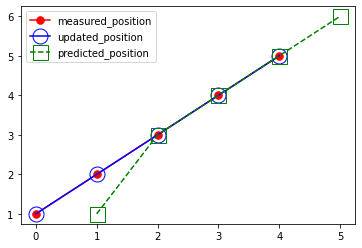

In [228]:
plt.figure()
plt.plot(step[:-1], measured_position[:-1], 'r.-', markerfacecolor = 'r', markersize=15, label='measured_position')
plt.plot(step[:-1], updated_position[:-1], 'bo-', markerfacecolor = 'none', markersize=15, label='updated_position')
plt.plot(step[1:], predicted_position[1:], 'gs--', markerfacecolor = 'none', markersize=15, label='predicted_position')
plt.legend()

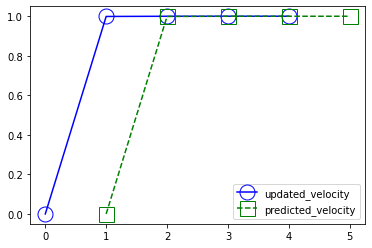

In [229]:
plt.figure()
plt.plot(step[:-1], updated_velocity[:-1], 'bo-', markerfacecolor = 'none', markersize=15, label='updated_velocity')
plt.plot(step[1:], predicted_velocity[1:], 'gs--', markerfacecolor = 'none', markersize=15, label='predicted_velocity')
plt.legend()

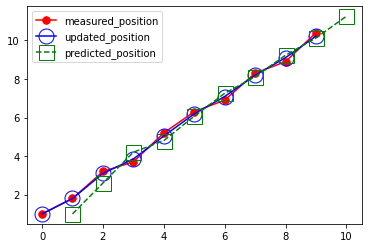

In [216]:
plt.figure()
plt.plot(step[:-1], measured_position[:-1], 'r.-', markerfacecolor = 'r', markersize=15, label='measured_position')
plt.plot(step[:-1], updated_position[:-1], 'bo-', markerfacecolor = 'none', markersize=15, label='updated_position')
plt.plot(step[1:], predicted_position[1:], 'gs--', markerfacecolor = 'none', markersize=15, label='predicted_position')
plt.legend()

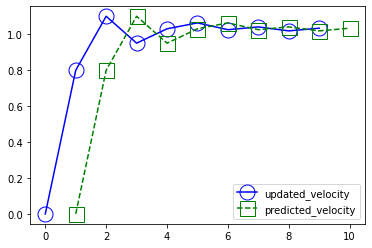

In [217]:
plt.figure()
plt.plot(step[:-1], updated_velocity[:-1], 'bo-', markerfacecolor = 'none', markersize=15, label='updated_velocity')
plt.plot(step[1:], predicted_velocity[1:], 'gs--', markerfacecolor = 'none', markersize=15, label='predicted_velocity')
plt.legend()

In [182]:
x.value[0][0]

0.0

In [91]:
np.arange(3)

array([0, 1, 2])

In [94]:
step

array([0, 1, 2, 3])

In [95]:
updated_position

array([0.999001  , 1.999001  , 2.99966661, 0.        ])

In [99]:
predicted_position

array([0.        , 0.999001  , 2.99800299, 3.99966644])

In [123]:
step

array([0, 1, 2, 3])

In [124]:
step[:-1]

array([0, 1, 2])

In [126]:
step[1:]

array([1, 2, 3])

In [240]:
import numpy as np
from numpy.linalg import inv

In [236]:
F = np.matrix([[1, 1],  
                        [0, 1]])

In [237]:
F * F

matrix([[1, 2],
        [0, 1]])

In [241]:
inv(F)

matrix([[ 1., -1.],
        [ 0.,  1.]])

In [244]:
F * np.identity(2)

matrix([[1., 1.],
        [0., 1.]])

# 14. Camera Measurement Model

In [245]:
ci = 957
cj = 651
fi = 2083
fj = 2083

px = 2
py = -2
pz = 0

print(ci - fi * py / px, cj - fj * pz / px)

3040.0 651.0


In [246]:
x = np.matrix([[10],
               [1],
               [-1],
               [0],
               [0],
               [0]])

In [247]:
x[0]

matrix([[10]])

In [248]:
float(x)


TypeError: only size-1 arrays can be converted to Python scalars

In [269]:
px_py_pz_1 = np.ones((4, 1))
px_py_pz_1

array([[1.],
       [1.],
       [1.],
       [1.]])

In [271]:
px_py_pz_1[0:3]

array([[1.],
       [1.],
       [1.]])

In [272]:
px_py_pz_1[0:3, 0]

array([1., 1., 1.])

In [279]:
x = np.matrix([[np.random.uniform(-5, 5)],
               [np.random.uniform(-5, 5)],
               [0],
               [0],
               [0],
               [0]])
x

matrix([[0.53314401],
        [4.4301894 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]])

In [281]:
x[0:3, 0]

matrix([[0.53314401],
        [4.4301894 ],
        [0.        ]])

In [282]:
x[0:3]

matrix([[0.53314401],
        [4.4301894 ],
        [0.        ]])

In [285]:
px_py_pz_1[0:3, 0] = x[0:3]

ValueError: could not broadcast input array from shape (3,1) into shape (3)

In [283]:
px_py_pz_1[0:3] = x[0:3]

In [284]:
px_py_pz_1

array([[0.53314401],
       [4.4301894 ],
       [0.        ],
       [1.        ]])

In [258]:
np.radians(45)

0.7853981633974483

In [259]:
np.pi/4

0.7853981633974483

In [264]:
np.arctan(1)

0.7853981633974483

In [263]:
np.tan(np.radians(0)), np.tan(np.radians(45)), np.tan(np.radians(90)), np.tan(np.radians(-45)),

(0.0, 0.9999999999999999, 1.633123935319537e+16, -0.9999999999999999)

In [250]:
np.pi

3.141592653589793

In [256]:
np.arctan(np.pi/2), np.arctan(np.pi/4)

(1.0038848218538872, 0.6657737500283538)